In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf  # For tf.data
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.applications import EfficientNetB0

# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224
BATCH_SIZE = 64


In [2]:
dataset_name = "food101"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train", "validation"], with_info=True, as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes


In [3]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))


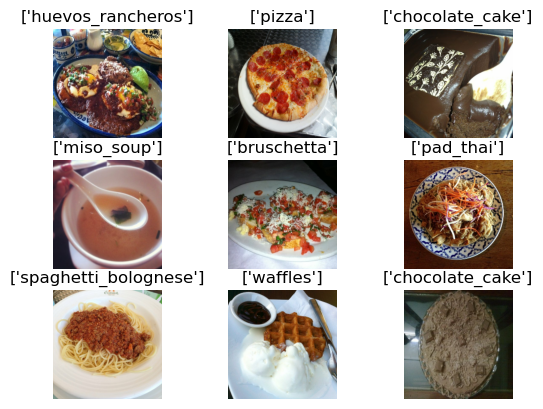

In [4]:
def format_label(label):
    string_label = label_info.int2str(label)
    return string_label.split("-")


label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("{}".format(format_label(label)))
    plt.axis("off")


In [7]:
!pip install validators matplotlib



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')


Using cuda for inference


In [3]:
torch.cuda.is_available()


True

In [9]:

efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub','nvidia_efficientnet_widese_b4', pretrained=True,)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')
efficientnet.eval().to(device)


Using cache found in C:\Users\Kevin Tian/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\Kevin Tian/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=48, out_features=12, bias=True)
          (expand): Linear(in_features=12, out_features=48, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
    

In [20]:
uris = [
    'https://github.com/lleiva25/Project4/blob/main/Images/almond.jpg?raw=true',
    'https://github.com/lleiva25/Project4/blob/main/Images/almond1.jpg?raw=true',
    'https://github.com/lleiva25/Project4/blob/main/Images/almond2.jpeg?raw=true',
    'https://github.com/lleiva25/Project4/blob/main/Images/almond3.png?raw=true',
    "https://github.com/lleiva25/Project4/blob/main/Images/strawberry.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/strawberry1.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/strawberry2.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/strawberry3.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/rice2.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/rice3.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/dairy1.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/grapes3.jpg?raw=true",
    "https://github.com/lleiva25/Project4/blob/main/Images/lettuce5.jpeg?raw=true"

]
batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)


In [21]:
with torch.no_grad():
    output = torch.nn.functional.softmax(efficientnet(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)


sample 0: [('mortar', '78.3%'), ('pill bottle', '6.8%'), ('caldron, cauldron', '1.5%'), ('coil, spiral, volute, whorl, helix', '1.4%'), ('mixing bowl', '1.0%')]
sample 1: [('plate', '46.1%'), ('espresso', '24.9%'), ('mixing bowl', '7.6%'), ('tray', '3.9%'), ('wok', '3.6%')]
sample 2: [('pill bottle', '91.2%'), ('mortar', '3.1%'), ('packet', '0.2%'), ('coil, spiral, volute, whorl, helix', '0.2%'), ('matchstick', '0.1%')]
sample 3: [('confectionery, confectionary, candy store', '53.8%'), ('coil, spiral, volute, whorl, helix', '20.9%'), ('grocery store, grocery, food market, market', '4.4%'), ('corn', '4.1%'), ('bakery, bakeshop, bakehouse', '0.7%')]
sample 4: [('strawberry', '99.0%'), ('banana', '0.1%'), ('grocery store, grocery, food market, market', '0.1%'), ('lemon', '0.1%'), ('pineapple, ananas', '0.0%')]
sample 5: [('strawberry', '99.6%'), ('banana', '0.0%'), ('lemon', '0.0%'), ('trifle', '0.0%'), ('pineapple, ananas', '0.0%')]
sample 6: [('strawberry', '98.9%'), ('banana', '0.1%'),

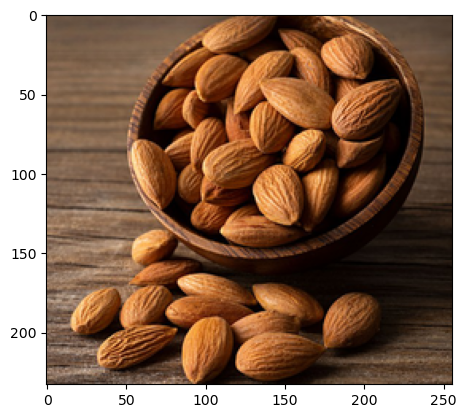

[('mortar', '78.3%'), ('pill bottle', '6.8%'), ('caldron, cauldron', '1.5%'), ('coil, spiral, volute, whorl, helix', '1.4%'), ('mixing bowl', '1.0%')]


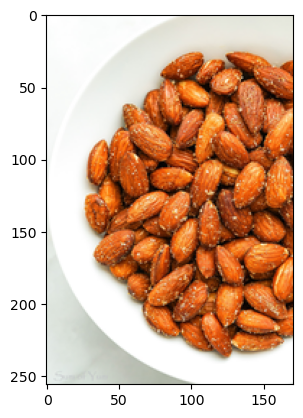

[('plate', '46.1%'), ('espresso', '24.9%'), ('mixing bowl', '7.6%'), ('tray', '3.9%'), ('wok', '3.6%')]


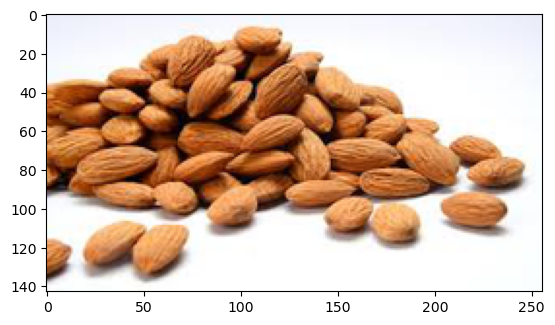

[('pill bottle', '91.2%'), ('mortar', '3.1%'), ('packet', '0.2%'), ('coil, spiral, volute, whorl, helix', '0.2%'), ('matchstick', '0.1%')]


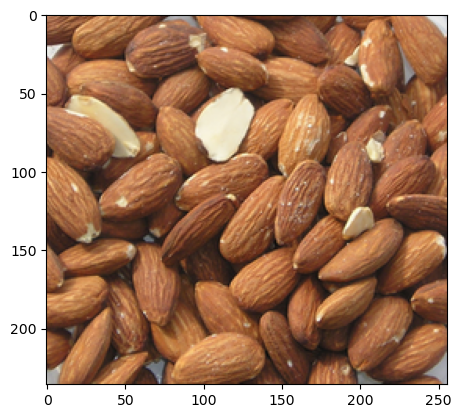

[('confectionery, confectionary, candy store', '53.8%'), ('coil, spiral, volute, whorl, helix', '20.9%'), ('grocery store, grocery, food market, market', '4.4%'), ('corn', '4.1%'), ('bakery, bakeshop, bakehouse', '0.7%')]


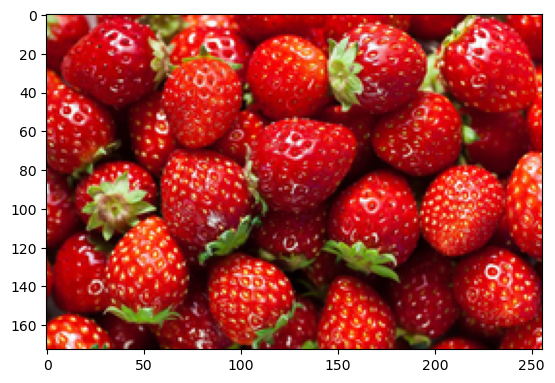

[('strawberry', '99.0%'), ('banana', '0.1%'), ('grocery store, grocery, food market, market', '0.1%'), ('lemon', '0.1%'), ('pineapple, ananas', '0.0%')]


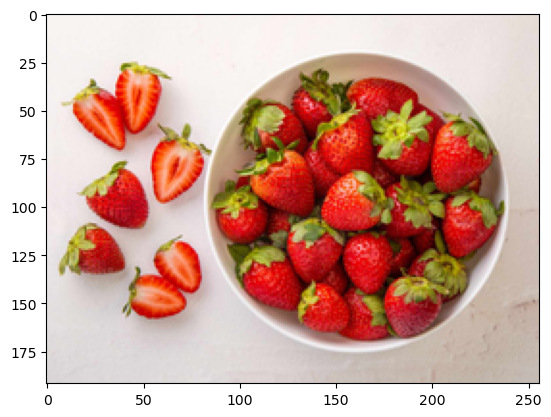

[('strawberry', '99.6%'), ('banana', '0.0%'), ('lemon', '0.0%'), ('trifle', '0.0%'), ('pineapple, ananas', '0.0%')]


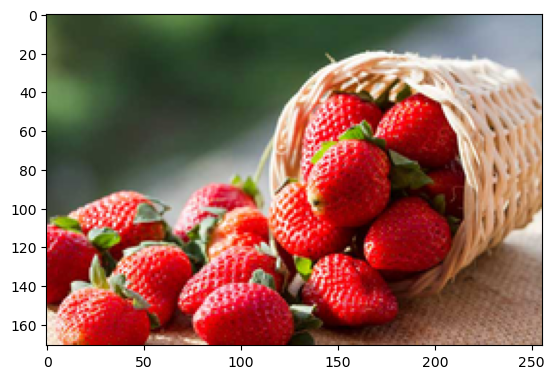

[('strawberry', '98.9%'), ('banana', '0.1%'), ('trifle', '0.1%'), ('pineapple, ananas', '0.1%'), ('lemon', '0.0%')]


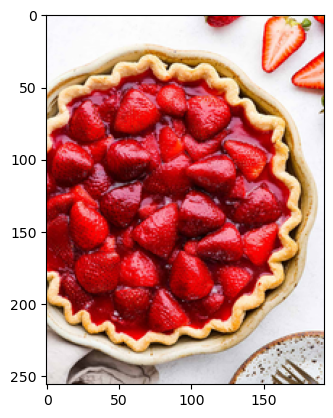

[('strawberry', '98.8%'), ('banana', '0.2%'), ('trifle', '0.1%'), ('fig', '0.1%'), ('lemon', '0.1%')]


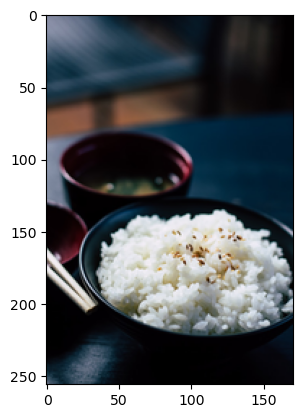

[('mashed potato', '73.6%'), ('frying pan, frypan, skillet', '6.9%'), ('wok', '4.8%'), ('plate', '4.1%'), ('meat loaf, meatloaf', '1.9%')]


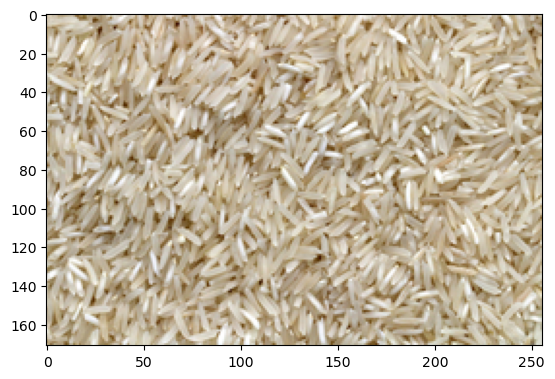

[('corn', '51.4%'), ('pill bottle', '21.9%'), ('goldfish, Carassius auratus', '4.3%'), ('mortar', '3.3%'), ('axolotl, mud puppy, Ambystoma mexicanum', '2.2%')]


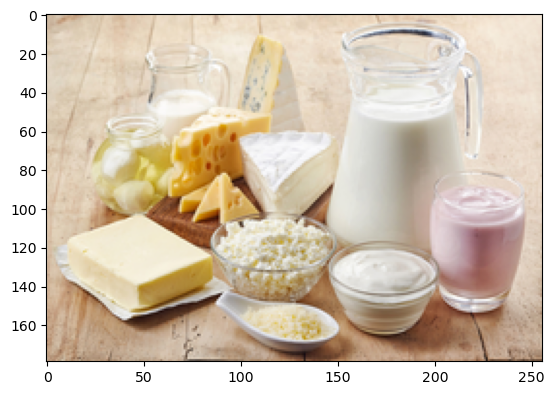

[('burrito', '43.5%'), ('plate', '31.8%'), ('French loaf', '4.2%'), ('restaurant, eating house, eating place, eatery', '3.2%'), ('eggnog', '2.4%')]


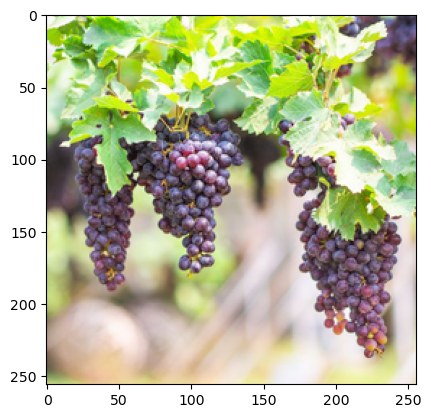

[('buckeye, horse chestnut, conker', '38.2%'), ('pot, flowerpot', '25.9%'), ('hip, rose hip, rosehip', '5.1%'), ('grocery store, grocery, food market, market', '3.9%'), ('strawberry', '2.8%')]


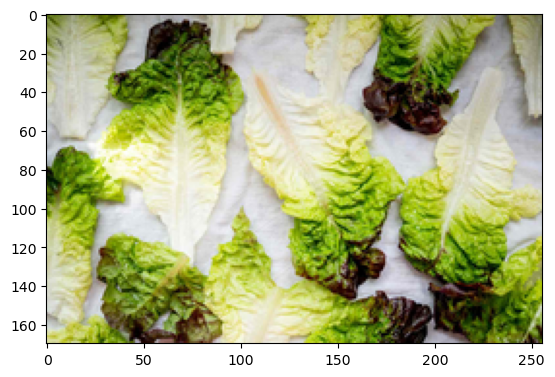

[('grocery store, grocery, food market, market', '90.4%'), ('coral fungus', '1.3%'), ('butcher shop, meat market', '0.8%'), ('coral reef', '0.8%'), ('buckeye, horse chestnut, conker', '0.8%')]


In [22]:
for uri, result in zip(uris, results):
    img = Image.open(requests.get(uri, stream=True).raw)
    img.thumbnail((256,256), Image.LANCZOS)
    plt.imshow(img)
    plt.show()
    print(result)
